# Выбор локации для скважины

## Загрузка и подготовка данных

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, make_scorer

RANDOM_STATE = 42

In [4]:
path1 = '/datasets/geo_data_0.csv'
path2 = 'C:/Users/Kseno/Downloads/geo_data_0.csv'

if os.path.exists(path1):
    data_0 = pd.read_csv(path1, index_col='id')
elif os.path.exists(path2):
    data_0 = pd.read_csv(path2, index_col='id')
else:
    print('Что-то пошло не так')

In [5]:
data_0.head()

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


In [8]:
data_0.duplicated().sum()

0

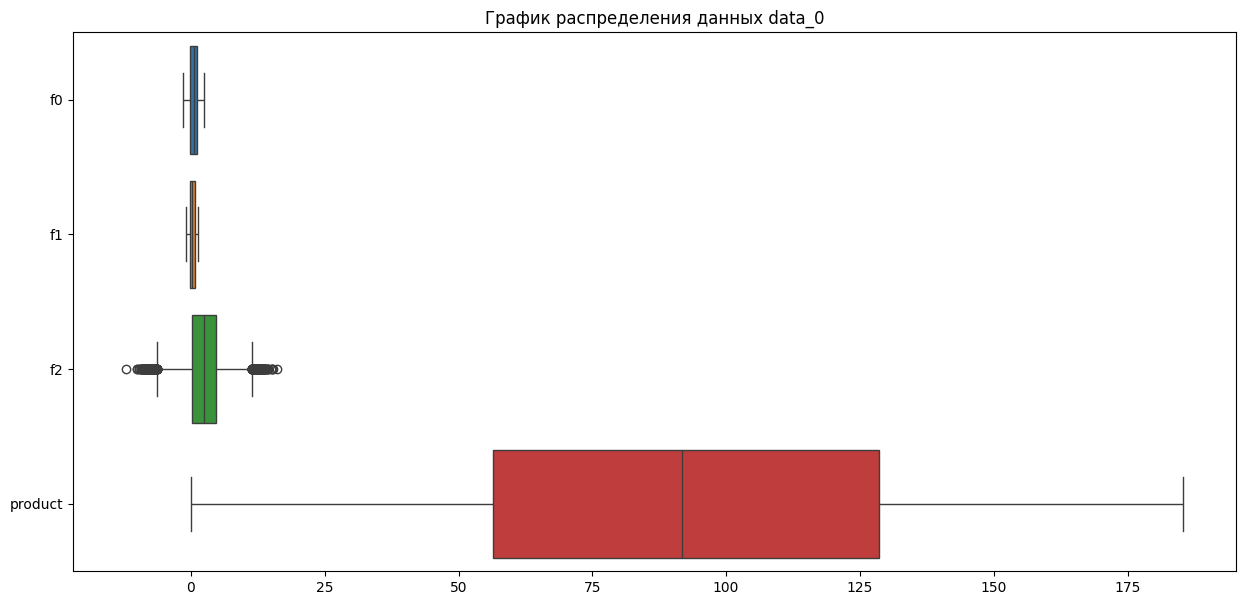

In [9]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=data_0, orient='h')
plt.title('График распределения данных data_0')
plt.show()

Целевой признак и входные f0 и f1 не имеют выбросов. Входной признак f2 стоит рассмотреть внимательней.

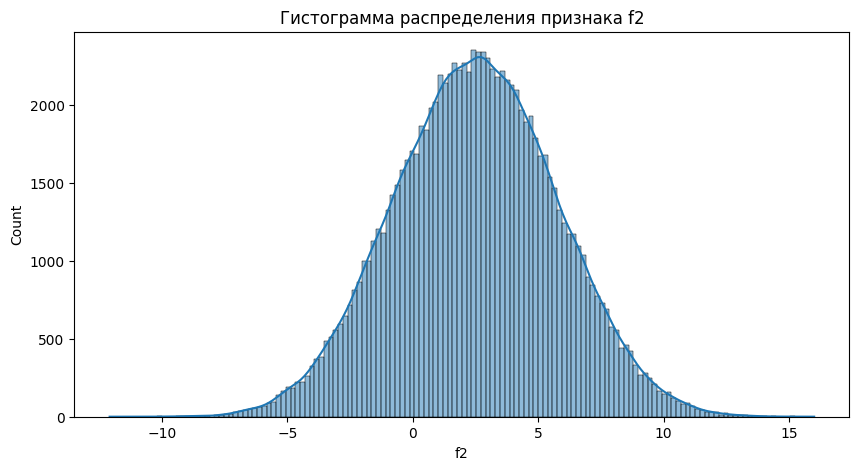

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data_0['f2'], kde=True)
plt.title('Гистограмма распределения признака f2')
plt.show()

Входной признак f2 имеет нормальное распределение с небольшим количеством очень маленьких и очень больших значений. Данные не похожи на выбросы.

In [13]:
corr_0 = data_0.corr(method='spearman')
corr_0

,f0,f1,f2,product
f0,1.000000,-0.471395,-0.002685,0.128417
f1,-0.471395,1.000000,0.001413,-0.181143
f2,-0.002685,0.001413,1.000000,0.486394
product,0.128417,-0.181143,0.486394,1.000000


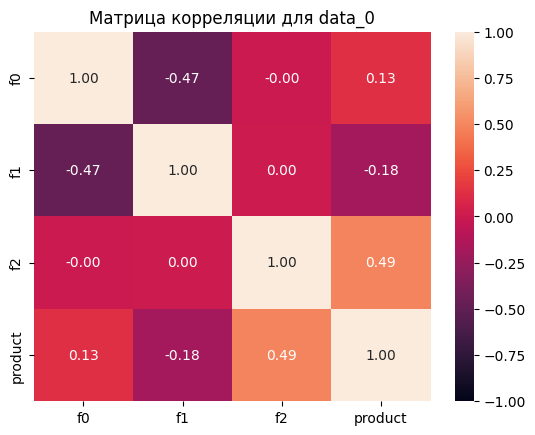

In [14]:
sns.heatmap(corr_0, annot=True, vmin=-1, fmt='.2f')
plt.title('Матрица корреляции для data_0')
plt.show()

* в датасете `data_0` содержится 100 000 строк и 5 столбцов;
* пропусков, дубликатов и выбросов нет;
* типы данных верные;
* мультиколлинеарности между признаками нет.

In [16]:
path1 = '/datasets/geo_data_1.csv'
path2 = 'C:/Users/Kseno/Downloads/geo_data_1.csv'

if os.path.exists(path1):
    data_1 = pd.read_csv(path1, index_col='id')
elif os.path.exists(path2):
    data_1 = pd.read_csv(path2, index_col='id')
else:
    print('Что-то пошло не так')

In [17]:
data_1.head()

,f0,f1,f2,product
id,,,,
kBEdx,-15.001348,-8.276000,-0.005876,3.179103
62mP7,14.272088,-3.475083,0.999183,26.953261
vyE1P,6.263187,-5.948386,5.001160,134.766305
KcrkZ,-13.081196,-11.506057,4.999415,137.945408
AHL4O,12.702195,-8.147433,5.004363,134.766305


In [18]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [19]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


In [20]:
data_1.duplicated().sum()

0

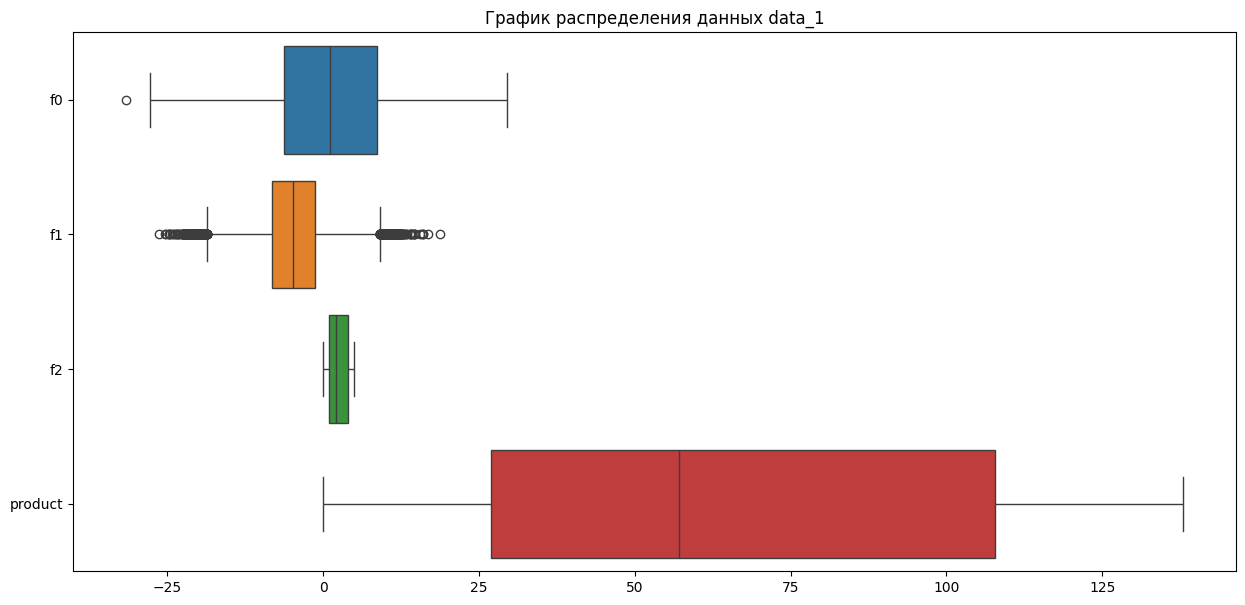

In [21]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=data_1, orient='h')
plt.title('График распределения данных data_1')
plt.show()

Целевой признак и признак f2 не имеют выбросов. Признаки f0 и f1 стоит рассмотреть внимательней.

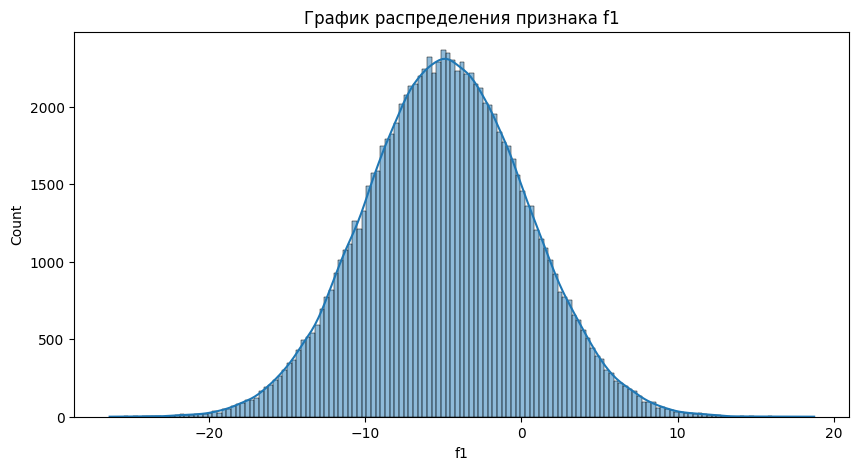

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(data_1['f1'], kde=True)
plt.title('График распределения признака f1')
plt.show()

Приззнак f1 имеет нормальное распределение с большим количеством очень маленьких и очень больших значений. Выбросов нет.

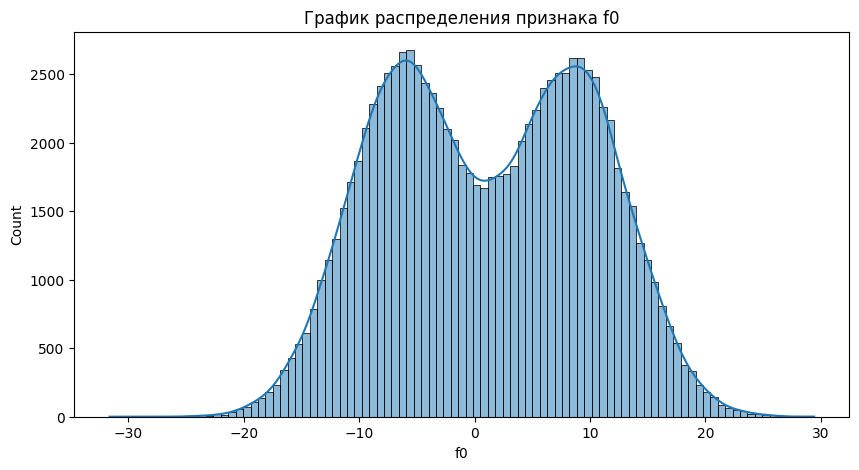

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(data_1['f0'], kde=True)
plt.title('График распределения признака f0')
plt.show()

Признак f0 имеет бимодальное распределние с двумя пиками: в районе -8 и +10. Выбросов не наблюдается.

In [27]:
corr_1 = data_1.corr(method='spearman')
corr_1

,f0,f1,f2,product
f0,1.000000,0.182248,-0.002000,-0.122869
f1,0.182248,1.000000,-0.003678,-0.033908
f2,-0.002000,-0.003678,1.000000,0.975605
product,-0.122869,-0.033908,0.975605,1.000000


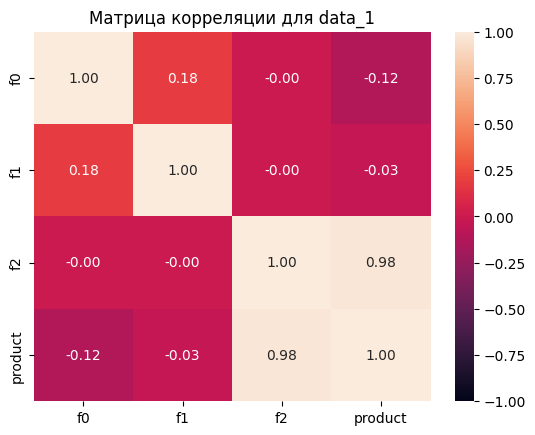

In [28]:
sns.heatmap(corr_1, vmin=-1, annot=True, fmt='.2f')
plt.title('Матрица корреляции для data_1')
plt.show()

Мультиколлинеарности между входными признаками нет. Таргет имеет очень высокую корреляцию с признаком f2.

* в датасете `data_1` содержится 100 000 строк и 5 столбцов;
* пропусков, дубликатов и выбросов нет;
* типы данных верные;
* мультиколлинерности между признаками нет.

In [31]:
path1 = '/datasets/geo_data_2.csv'
path2 = 'C:/Users/Kseno/Downloads/geo_data_2.csv'

if os.path.exists(path1):
    data_2 = pd.read_csv(path1, index_col='id')
elif os.path.exists(path2):
    data_2 = pd.read_csv(path2, index_col='id')
else:
    print('Что-то пошло не так')

In [32]:
data_2.head()

,f0,f1,f2,product
id,,,,
fwXo0,-1.146987,0.963328,-0.828965,27.758673
WJtFt,0.262778,0.269839,-2.530187,56.069697
ovLUW,0.194587,0.289035,-5.586433,62.871910
q6cA6,2.236060,-0.553760,0.930038,114.572842
WPMUX,-0.515993,1.716266,5.899011,149.600746


In [33]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [34]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


In [35]:
data_2.duplicated().sum()

0

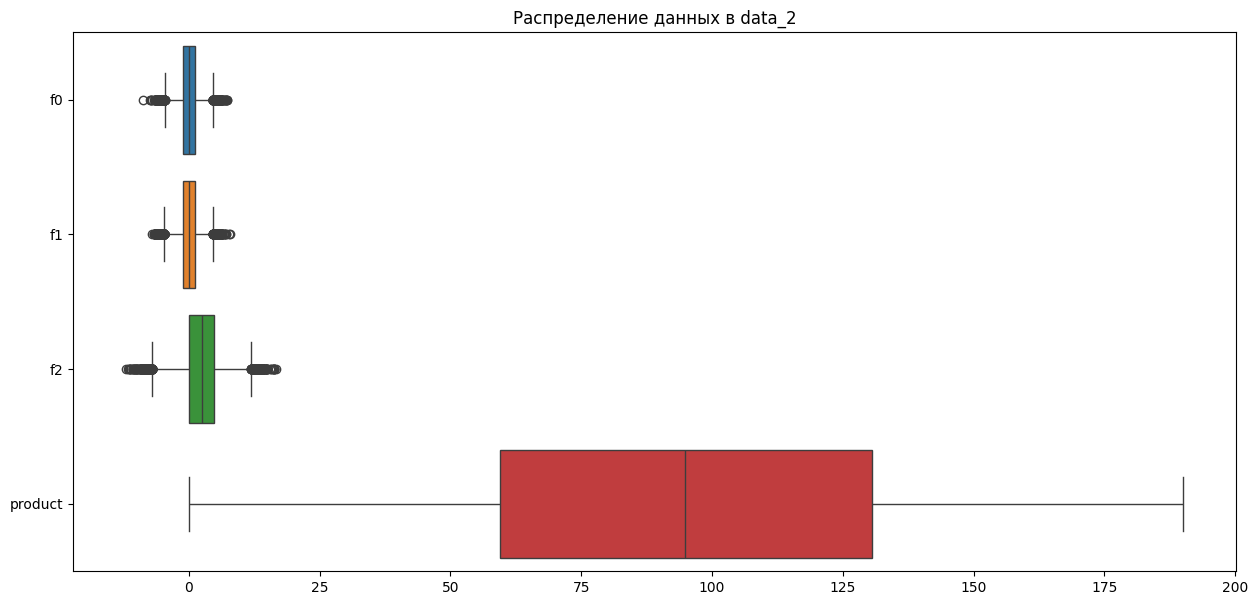

In [36]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=data_2, orient='h')
plt.title('Распределение данных в data_2')
plt.show()

Целевой признак точно не имеет выбросов. Входные признаки стоит рассмотреть внимательнее.

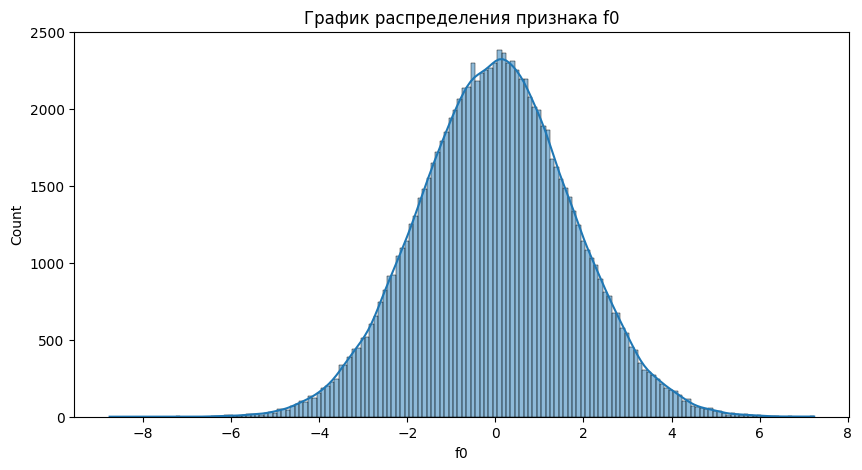

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(data_2['f0'], kde=True)
plt.title('График распределения признака f0')
plt.show()

Признак f0 имеет нормальное распределение. Выбросов нет.

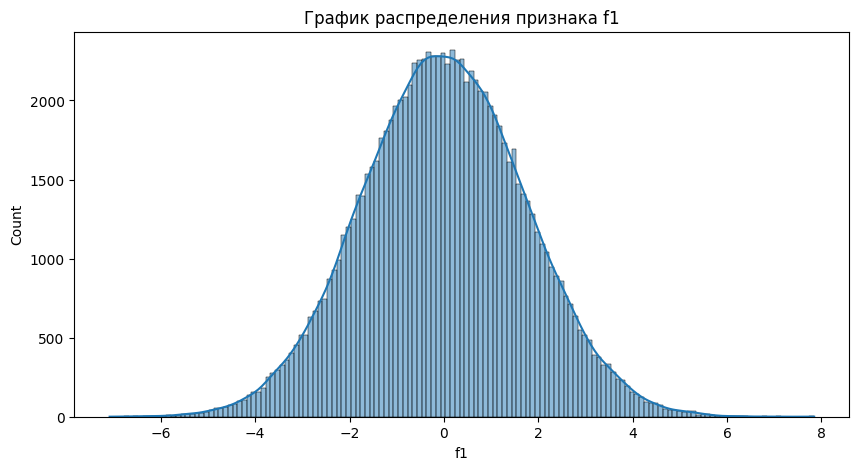

In [40]:
plt.figure(figsize=(10, 5))
sns.histplot(data_2['f1'], kde=True)
plt.title('График распределения признака f1')
plt.show()

Признак f1 так же имеет нормальное распределение без выбросов.

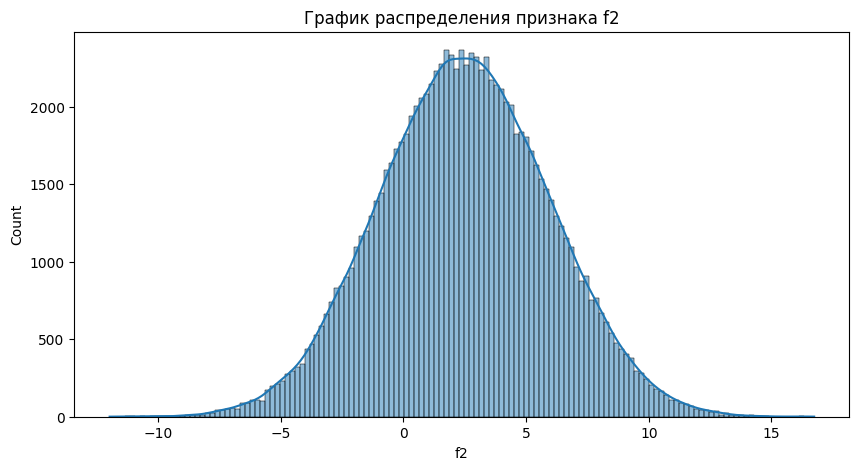

In [42]:
plt.figure(figsize=(10, 5))
sns.histplot(data_2['f2'], kde=True)
plt.title('График распределения признака f2')
plt.show()

Признак f2 так же имеет нормальное распределение без выбросов.

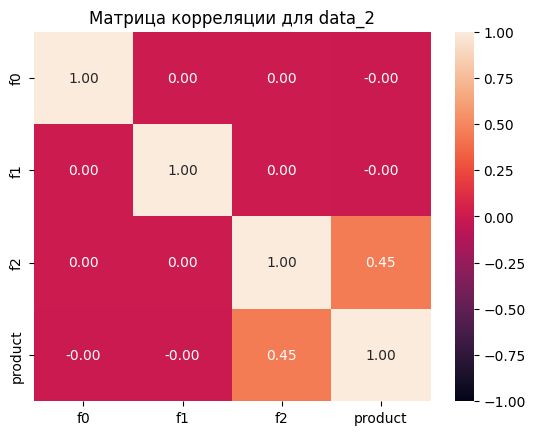

In [44]:
corr_2 = data_2.corr(method='spearman')
sns.heatmap(corr_2, vmin=-1, annot=True, fmt='.2f')
plt.title('Матрица корреляции для data_2')
plt.show()

Между входными признаками отсутствует корреляция. При этом с таргетом коррелирует только один признак. Применю полиномизацию признаков для исправления ситуации.

In [46]:
# Полиномизация признаков и создание датафрейма с новыми признаками и таргетом
X = data_2[['f0', 'f1', 'f2']]
y = data_2['product']

poly = PolynomialFeatures(degree=2, include_bias=False).fit(X)
X_poly = poly.transform(X)

poly_data = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
result = pd.concat([poly_data, y.reset_index(drop=True)], axis=1)
result.head()

,f0,f1,f2,f0^2,f0 f1,f0 f2,f1^2,f1 f2,f2^2,product
0,-1.146987,0.963328,-0.828965,1.315579,-1.104925,0.950812,0.928001,-0.798565,0.687183,27.758673
1,0.262778,0.269839,-2.530187,0.069052,0.070908,-0.664877,0.072813,-0.682743,6.401844,56.069697
2,0.194587,0.289035,-5.586433,0.037864,0.056243,-1.087049,0.083541,-1.614675,31.208231,62.871910
3,2.236060,-0.553760,0.930038,4.999963,-1.238240,2.079620,0.306650,-0.515018,0.864970,114.572842
4,-0.515993,1.716266,5.899011,0.266249,-0.885581,-3.043848,2.945567,10.124270,34.798336,149.600746


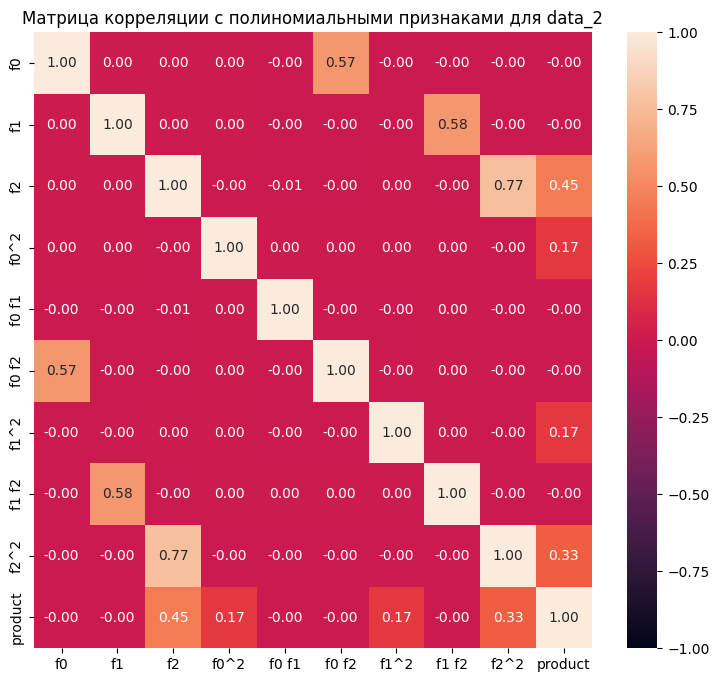

In [47]:
corr_poly = result.corr(method='spearman')
plt.figure(figsize=(9, 8))
sns.heatmap(corr_poly, vmin=-1, annot=True, fmt='.2f')
plt.title('Матрица корреляции с полиномиальными признаками для data_2')
plt.show()

После полиномизации между несколькими входными признаками образовалась корреляция. Так же с целевым признаком стали коррелировать ещё 3 признака.

* в датасете `data_2` содержится 100 000 строк и 5 столбцов;
* пропусков, дубликатов и выбросов нет;
* типы данных верные;
* признаки были полиномизованы для большей корреляции;
* мультиколлинеарности между признаками нет.

**Итоги раздела:**
1. В датафреймах `data_0`, `data_1` и `data_2` содержится по 100 000 строк и по 5 столбцов, в данных нет пропусков и дубликатов, типы данных верные.
2. Все данные были проверены на выбросы, выбросов нет.
3. Практически все признаки имеют нормальное распределение.
4. Мультиколлинерности между признаками не наблюдается.
5. Для увеличения корреляции признаки в `data_2` были полиномизованы.

## Обучение и проверка модели

In [52]:
def geo_pred(data, name):
    
    X_train, X_valid, y_train, y_valid = train_test_split(
    data.drop('product', axis=1),
    data['product'],
    test_size=0.25,
    random_state=RANDOM_STATE)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaler = scaler.transform(X_valid)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    pred = model.predict(X_valid_scaler)
    rmse = root_mean_squared_error(y_valid, pred)
    
    print(f'Средний запас предсказанного сырья для региона {name} составляет: {pred.mean():.2f}')
    print(f'RMSE модели для региона {name} составляет: {rmse:.2f}')
    
    df = pd.DataFrame(
        {'pred':pred,
         'actual':y_valid
        }, index=y_valid.index
    )
    return df

In [53]:
result_0 = geo_pred(data_0, 'data_0')

Средний запас предсказанного сырья для региона data_0 составляет: 92.40
RMSE модели для региона data_0 составляет: 37.76


In [54]:
result_1 = geo_pred(data_1, 'data_1')

Средний запас предсказанного сырья для региона data_1 составляет: 68.71
RMSE модели для региона data_1 составляет: 0.89


In [55]:
result_2 = geo_pred(data_2, 'data_2')

Средний запас предсказанного сырья для региона data_2 составляет: 94.77
RMSE модели для региона data_2 составляет: 40.15


**Итоги раздела:**
1. Средний запас предсказанного сырья для региона `data_0` составляет: 92.40
2. RMSE модели для региона `data_0` составляет: 37.76
3. Средний запас предсказанного сырья для региона `data_1` составляет: 68.71
4. RMSE модели для региона `data_1` составляет: 0.89
5. Средний запас предсказанного сырья для региона `data_2` составляет: 94.77
6. RMSE модели для региона `data_2` составляет: 40.15
7. По запасам сырья лидирует регион `data_2`, но имеет самую высокую среднеквадратичную ошибку.
8. Регион `data_1` имеет самую низкую ошибку, но при этом самый низкий запас сырья.
9. Предсказания и правильные ответы на валидационной выборке по каждому региону хранятся в датафреймах `result` с соответствующим номером региона.

## Подготовка к расчёту прибыли

In [58]:
# Данные для расчётов
BUDGET = 10_000_000_000
BUDGET_PER_WELL = 50_000_000 # budget / well_best
WELL_RESEARCH = 500
WELL_BEST = 200
INCOME = 450_000
PROBABILITY = 2.5
RISK = 1+(PROBABILITY/100) # Коэффициент риска

In [59]:
best_vol = BUDGET / (WELL_BEST*INCOME*RISK)
f'Достаточный объём сырья для безубыточной разработки скважины: {best_vol:.2f}'

'Достаточный объём сырья для безубыточной разработки скважины: 108.40'

**Итоги раздела:** 
1. Достаточный объём сырья для безубыточной разработки скважины: 108.40
2. Средние предсказанные запасы сырья в регионах: 
  * `data_0`: 92.40
  * `data_1`: 68.71
  * `data_2`: 94.77
3. Ни один регион не подходит.

## Функция для расчета прибыли 

In [62]:
# Функция для расчёта прибыли по лучшим скважинам в регионе
def profit_sort(df, name):
    sort = df.sort_values(by='pred', ascending=False).head(200)
    amount = sort['pred'].sum()
    profit = (amount * INCOME) - BUDGET
    return f'Прибыль по выбранным лучшим скважинам в регионе {name} составляет {profit:.2f} рублей'

In [63]:
profit_sort(result_0, 'data_0')

'Прибыль по выбранным лучшим скважинам в регионе data_0 составляет 3896658479.67 рублей'

In [64]:
profit_sort(result_1, 'data_1')

'Прибыль по выбранным лучшим скважинам в регионе data_1 составляет 2486938115.00 рублей'

In [65]:
profit_sort(result_2, 'data_2')

'Прибыль по выбранным лучшим скважинам в регионе data_2 составляет 3377981513.71 рублей'

**Итоги раздела:**
1. Суммарная прибыль по 200 лучшим скважинам в регионе составляет:
  * `data_0` 3 896 658 479.67 рублей
  * `data_1` 2 486 938 115.00 рублей
  * `data_2` 3 377 981 513.71 рублей
2. Лидирует регион `data_0`

## Риски и прибыль для каждого региона

In [68]:
def calculate_profit(df, name):
    state = np.random.RandomState(12345)
    
    def simple_profit(actual, pred):
        pred_sorted = pred.sort_values(ascending=False)
        sel_points = actual[pred_sorted.index][:WELL_BEST]
        product = sel_points.sum()
        revenue = product * INCOME
        cost = BUDGET
        return revenue - cost

    profits = []

    for _ in range(1000):
        targets = df['actual'].sample(n=500, replace=True, random_state=state)
        predictions = df['pred'].loc[targets.index]
        profit = simple_profit(targets, predictions)
        profits.append(profit)
    
    profits = np.array(profits)
    mean_profit = np.mean(profits)
    conf_interval = np.quantile(profits, [0.025, 0.975])
    risk = (profits < 0).mean()*100
    return f'Средняя прибыль для региона {name} составляет: {mean_profit}, доверительный интервал [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}], риск убытков {risk}%'

In [69]:
calculate_profit(result_0, 'data_0')

'Средняя прибыль для региона data_0 составляет: 435933772.1386621, доверительный интервал [-116231612.78, 966504180.71], риск убытков 6.1%'

In [70]:
calculate_profit(result_1, 'data_1')

'Средняя прибыль для региона data_1 составляет: 489661254.41175246, доверительный интервал [55116177.27, 905762650.42], риск убытков 1.0999999999999999%'

In [71]:
calculate_profit(result_2, 'data_2')

'Средняя прибыль для региона data_2 составляет: 403687927.86213845, доверительный интервал [-153116984.76, 952887416.71], риск убытков 7.1%'

**Вывод:** для разработки лучше всего подойдет регион `data_1`. Не смотря на самые низкие запасы нефти модель, обученная на данных этого региона совершает минимум ошибок. Так же по расчётам в этом регионе ожидается самая высокая прибыль, 95%-й доверительный интервал находится в положительных границах, в отличие от остальных регионов, а так же в этом регионе самый низкий риск убытков.

**Итоги раздела:**
1. Средняя прибыль для региона `data_0` составляет: 435 933 772.14, доверительный интервал [-116231612.78, 966504180.71], риск убытков 6.1%.
2. Средняя прибыль для региона `data_1` составляет: 489 661 254.41, доверительный интервал [55116177.27, 905762650.42], риск убытков 1.10%.
3. Средняя прибыль для региона `data_2` составляет: 403 687 927.86, доверительный интервал [-153116984.76, 952887416.71], риск убытков 7.1%.
4. Лучшим регином для разработки скважин был выбран `data_1`, так как в этом регионе ожидается самая высокая прибыль, 95%-й доверительный интервал находится в положительных границах, а так же в этом регионе самый низкий риск убытков.

## Общий вывод

### В этом проекте я проделала следующую работу:
1. Загрузила данные из 3-х датафреймов: `data_0`, `data_1` и `data_2`.
2. Изучила распределение целевого и входных признаков для всех датафреймов.
3. Провела полиномизацию признаков в датафрейме `data_2`.
4. Построила матрицы корреляции для всех данных.
5. Обучила модель Линейной регрессии для предсказания запасов сырья.
6. Получила предсказание среднего запаса сырья и RMSE модели для каждого региона.
7. Рассчитала прибыль, достаточный объем сырья для безубытной разработки скважины, 95%-й доверительный интервал и риск убытков для каждого региона.

### На основании проделанной работы можно сделать следующие выводы:
* В датафреймах `data_0`, `data_1` и `data_2` содержится по 100 000 строк и по 5 столбцов, в данных нет пропусков и дубликатов, типы данных верные, выбросов нет, почти все признаки имеют нормальное распределение, мультиколлинерности не наблюдается.
* Средний запас предсказанного сырья для региона `data_0` составляет: 92.40; RMSE модели: 37.76.
* Средний запас предсказанного сырья для региона `data_1` составляет: 68.71; RMSE модели: 0.89.
* Средний запас предсказанного сырья для региона `data_2` составляет: 94.77; RMSE модели: 40.15.
* Достаточный объём сырья для безубыточной разработки скважины: 108.40.
* Суммарная прибыль по 200 лучшим скважинам в регионе составляет:
  * `data_0` 3 896 658 479.67 рублей
  * `data_1` 2 486 938 115.00 рублей
  * `data_2` 3 377 981 513.71 рублей
* Средняя прибыль для региона `data_0` составляет: 435 933 772.14, доверительный интервал [-116231612.78, 966504180.71], риск убытков 6.1%.
* Средняя прибыль для региона `data_1` составляет: 489 661 254.41, доверительный интервал [55116177.27, 905762650.42], риск убытков 1.10%.
* Средняя прибыль для региона `data_2` составляет: 403 687 927.86, доверительный интервал [-153116984.76, 952887416.71], риск убытков 7.1%.
* Лучшим регином для разработки скважин был выбран `data_1`, так как в этом регионе ожидается самая высокая прибыль, 95%-й доверительный интервал находится в положительных границах, а так же в этом регионе самый низкий риск убытков.

### Рекомендации:
1. Вести разработку новых скважин в регионе `data_1`.